<h2><font color="#004D7F" size=6>TFM


<h1><font color="#004D7F" size=5>DecisionTreeRegressor</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Jose Humberto Torres</font><br>
<font color="#004D7F" size=3>TFM</font><br>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>


En esta libreta se muestra una predicción de las HH Que se necesitan para mantenimiento correctivo en una empresa del sector industrial, la frecuencia es semanal, a continuación, se hace na breve descripción de la base de datos.:

* **semana:** Hace referencia a la semana del año en la cual se ejecuta el trabajo - se codifica con nombre del año seguido del número de la semana, un año por lo general tiene 52 semanas.
* **Disciplina:** La disciplina se refiera al grupo e equipo de trabajo que realiza mantenimientos en la presa, la empresa está dividida en 7 disciplinas: Pozos, Instrumentos, Mecánica, Mecánica VAL, Electricidad, Línea de Mtto, Mecánica CBM
* **Epocadelanio:** Esta variable hace referencia a la época del año en que se ejecuta el mantenimiento, generalmente son dos estaciones Invierno y verano.
* **Cumplimiento_Estrategia:** Se refiere al cumplimiento del plan de estrategia de mantenimiento preventivo ejecutado en el mes.
* **Cumplimiento_Programa:** Se refiere al cumplimiento del programa de mantenimiento ejecutado en el mes.
* **Ready_Backlog:** Es la carga de trabajo que tienen un equipo de trabajo, se mide en semanas
* **HH_Actv_Gnerales:** son las horas hombres que reportan en actividades generales, esta variable cuantitativa se por actividades como charlas de seguridad, celebraciones, reuniones entre otros.
* **HH_En_la_Maquina:** Es la variable objetivo y hace referencia al total de horas que el técnico necesita para ejecutar un trabajo en la maquina o equipo a reparar.
* **Otras_HH:** Esta variable se refiere a las horas adicionales que se requieren para hacer actividades propias del mantenimiento como lectura de permisos, transporte a sitio, alistamiento de herramientas entre otros.


<a id="section11"></a>
## <font color="#004D7F"> 1.1. Importar librerías</font>

Se importan los módulos y las librerías necesarias para este proceso.

In [2]:
# Load libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
# codigo para conectar con google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id="section12"></a>
## <font color="#004D7F"> 1.2. Cargar el dataset</font>

se cargan los datos de ventas, los cuales estan en formato CSV. Y  guardan en una Variable dataset - Que corresponde al DataFrame a trabajar.

In [4]:
# Load dataset
# se cargan los datos de ventas, los cuales estan en formato CSV. Y  guardan en una Variable df - Que corresponde al DataFrame a trabajar.
dataset = pd.read_csv('/content/drive/MyDrive/InfoTFM/semana.csv',index_col=0, sep=',', encoding='latin-1')



<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Estadística descriptiva</font>

Se analizan las diferentes variables y caracteristicas como:
* Dimensiones del conjunto de datos.
* Visualización de datos.
* Resumen estadístico de todos los atributos.
* Coorelación de atributos numéricos.
* Tipo de atributos.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Dimensiones del conjunto de datos</font>

Podemos tener una idea rápida de cuántas instancias (filas) y cuántos atributos (columnas) hay en nuestro conjunto de datos con la propiedad `shape`.  Donde se aprecia que el dataset cuanta con un total de 984 filas y  8 columnas.

In [5]:
# shape
dataset.shape

(984, 8)

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Visualización de datos</font>

También siempre es una buena idea ver como están representados los datos con la función `head()`

In [6]:
# head
dataset.head(5)

,Disciplina,Epocadelanio,Cumplimiento_Estrategia,Cumplimiento_Programa,Ready_Backlog,HH_Actv_Gnerales,HH_En_la_Maquina,Otras_HH
semana,,,,,,,,
2019-1,Instrumentos,Verano,0.98,0.95,5.16,0.37,3.27,0.67
2019-10,Pozoz,Verano,0.99,0.92,4.67,0.30,1.80,1.90
2019-11,Instrumentos,Verano,0.99,0.92,4.67,0.20,0.50,0.00
2019-12,Instrumentos,Verano,0.99,0.92,4.67,1.05,8.00,1.55
2019-12,Mecanica,Verano,0.99,0.92,4.67,0.70,9.00,1.30


In [7]:
# Tambien se puede observar - los diferentes nombres de las columas.
dataset = dataset.reset_index()

dataset.columns

Index(['semana', 'Disciplina', 'Epocadelanio', 'Cumplimiento_Estrategia',
       'Cumplimiento_Programa', 'Ready_Backlog', 'HH_Actv_Gnerales',
       'HH_En_la_Maquina', 'Otras_HH'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   semana                   984 non-null    object 
 1   Disciplina               984 non-null    object 
 2   Epocadelanio             984 non-null    object 
 3   Cumplimiento_Estrategia  984 non-null    float64
 4   Cumplimiento_Programa    984 non-null    float64
 5   Ready_Backlog            984 non-null    float64
 6   HH_Actv_Gnerales         984 non-null    float64
 7   HH_En_la_Maquina         984 non-null    float64
 8   Otras_HH                 984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.3+ KB


In [9]:
dataset.isna().sum().sort_values()

semana                     0
Disciplina                 0
Epocadelanio               0
Cumplimiento_Estrategia    0
Cumplimiento_Programa      0
Ready_Backlog              0
HH_Actv_Gnerales           0
HH_En_la_Maquina           0
Otras_HH                   0
dtype: int64

**Grafico de datos:** Se realiza un gráfico donde se puede observar en la parte X - El numero de la semana y en el eje Y - El total de horas hombre efectivas en la máquina - que es la variable a respuesta.

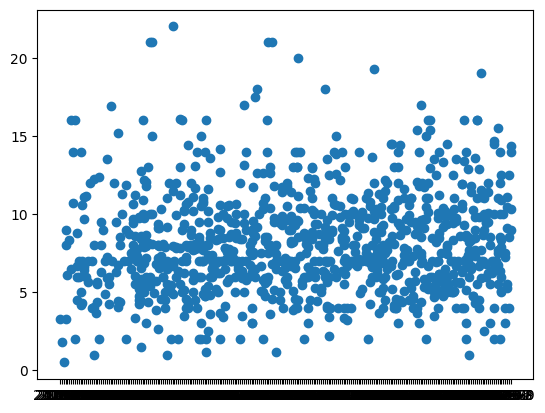

In [10]:
plt.scatter(dataset['semana'],dataset['HH_En_la_Maquina'])
plt.show()

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Resumen estadístico</font>

En este caso podemos echar un vistazo a un resumen de cada atributo con la función `describe()`. Esto incluye la media, los valores mínimo y máximo, así como algunos percentiles.

In [11]:
# descriptions
pd.set_option('display.precision', 1)
dataset.describe()

,Cumplimiento_Estrategia,Cumplimiento_Programa,Ready_Backlog,HH_Actv_Gnerales,HH_En_la_Maquina,Otras_HH
count,9.8e+02,9.8e+02,984.0,984.0,984.0,984.0
mean,9.9e-01,9.5e-01,5.3,0.7,8.1,2.0
std,1.1e-02,2.0e-02,0.6,0.3,3.3,1.0
min,9.5e-01,9.1e-01,4.0,0.0,0.5,0.0
25%,9.9e-01,9.4e-01,4.8,0.5,6.0,1.4
50%,9.9e-01,9.5e-01,5.3,0.7,7.6,1.9
75%,1.0e+00,9.7e-01,5.6,0.9,10.0,2.5
max,1.0e+00,9.9e-01,6.7,2.0,22.0,6.0


<a id="section24"></a>
## <font color="#004D7F"> 2.4. Tipo de datos</font>

Se puede observar el tipo de datos de cada una de la variables y adicionalmente se convierte la variable Epocadelanio en binaria 1 y  0 : 1 Para Verano y 2: Invierno.

In [12]:
dataset['Disciplina'] = dataset['Disciplina'].astype("object")


In [13]:
# Convertir variable categorica ciudad en 1 y 0
Epocadelanio = {'Invierno':0,'Verano':1}

dataset['Epocadelanio']=dataset['Epocadelanio'].map(Epocadelanio)

Podemos ver el tipo de variable de cada atributo con la propiedad `dtypes`.

In [14]:
# tipo de datos de las variables.
dataset.dtypes

semana                      object
Disciplina                  object
Epocadelanio                 int64
Cumplimiento_Estrategia    float64
Cumplimiento_Programa      float64
Ready_Backlog              float64
HH_Actv_Gnerales           float64
HH_En_la_Maquina           float64
Otras_HH                   float64
dtype: object

In [15]:
dataset.isna().sum().sort_values()

semana                     0
Disciplina                 0
Epocadelanio               0
Cumplimiento_Estrategia    0
Cumplimiento_Programa      0
Ready_Backlog              0
HH_Actv_Gnerales           0
HH_En_la_Maquina           0
Otras_HH                   0
dtype: int64

In [18]:
# Se observan los datos con la variable epoca del año 1 y 0.
dataset.head(444)

,semana,Disciplina,Epocadelanio,Cumplimiento_Estrategia,Cumplimiento_Programa,Ready_Backlog,HH_Actv_Gnerales,HH_En_la_Maquina,Otras_HH
0,2019-1,Instrumentos,1,1.0,0.9,5.2,0.4,3.3,0.7
1,2019-10,Pozoz,1,1.0,0.9,4.7,0.3,1.8,1.9
2,2019-11,Instrumentos,1,1.0,0.9,4.7,0.2,0.5,0.0
3,2019-12,Instrumentos,1,1.0,0.9,4.7,1.1,8.0,1.6
4,2019-12,Mecanica,1,1.0,0.9,4.7,0.7,9.0,1.3
...,...,...,...,...,...,...,...,...,...
439,2021-35,Electricidad,0,1.0,1.0,5.5,0.5,7.0,1.5
440,2021-35,Instrumentos,0,1.0,1.0,5.5,0.5,4.0,0.6
441,2021-37,Electricidad,0,1.0,1.0,5.5,0.6,7.2,1.7
442,2021-37,Instrumentos,0,1.0,1.0,5.5,0.3,5.8,0.5


<a id="section25"></a>
## <font color="#004D7F"> 2.5. Correlación entre atributos</font>

Como ya hemos visto es importante ver la correlación entre atributos ya que es preferible tener características indpendientes entre ella y dependientes con la clase. Para elo utilizaremos la función `corr(method='pearson')`.

In [17]:
# correlacion vista en grafico.
correlation = dataset.corr()
plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')
# ----------
plt.title('Correlación entre las  variables')
plt.show()

ValueError: could not convert string to float: '2019-1'

**Nota:** Se puede observar que la correlacion entre estas variables es muy debil

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Visualización del conjunto de datos</font>

Ahora tenemos una idea básica sobre los datos. Necesitamos extender eso con algunas visualizaciones. Vamos a ver dos tipos de gráficos de visualización de datos:
* Gráficos univariados para comprender mejor cada atributo.
* Gráficos multivariados para comprender mejor las relaciones entre los atributos.

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Gráficos Univariados</font>

Comenzamos con algunas gráficas univariadas, es decir, gráficas de cada variable individual. Es útil con la visualización tener una forma de referirse solo a los atributos de entrada y, por otro lado, solo a los atributos de salida.

<a id="section311"></a>
### <font color="#004D7F"> Boxplots</font>
Dado que las variables de entrada son numéricas, podemos crear Gráficas Boxplots de cada uno.

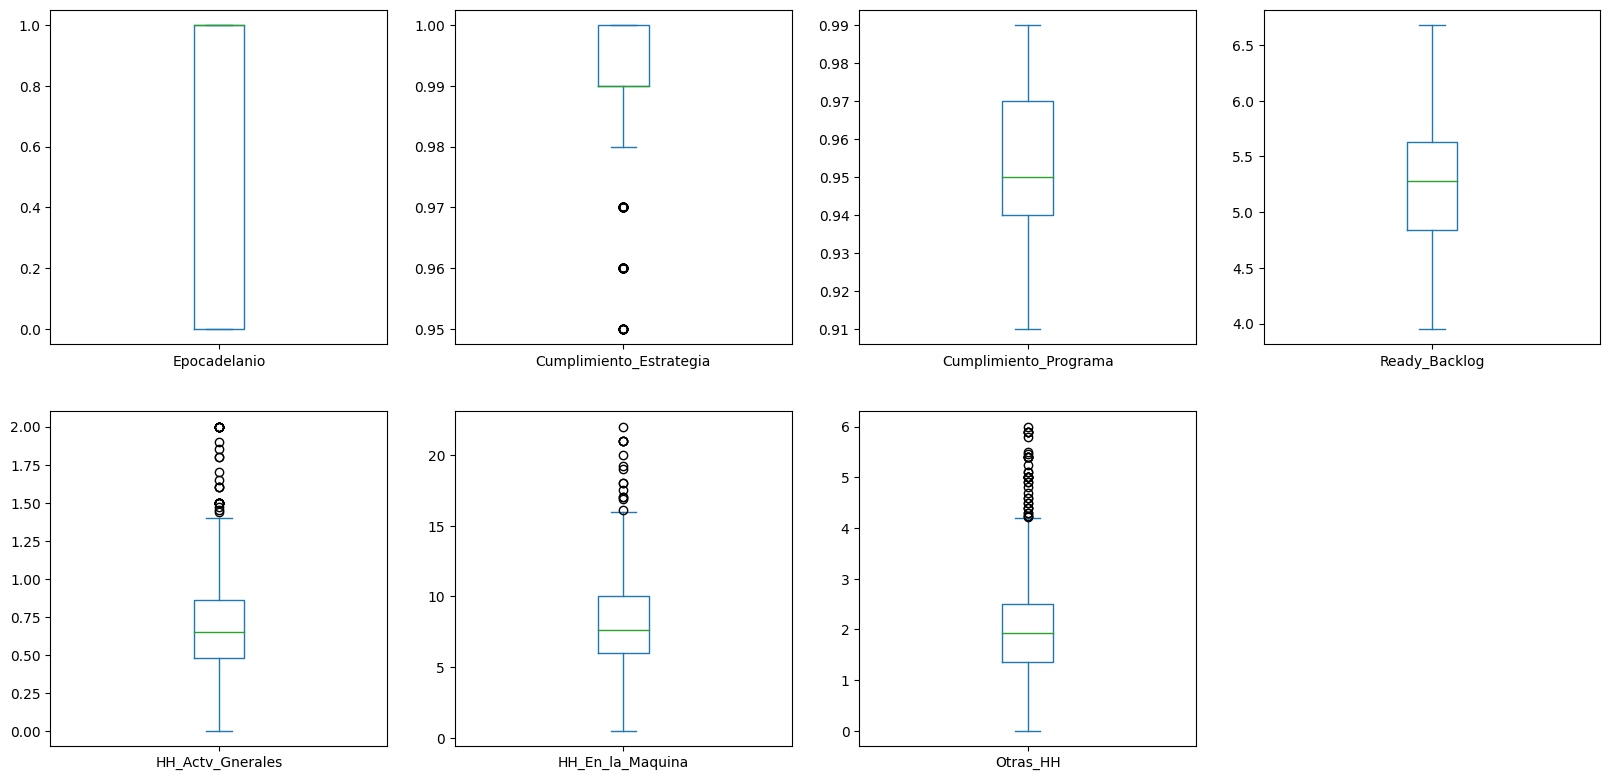

In [19]:
# box and whisker plots - Matplotlib
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.plot(ax=ax, kind= 'box', subplots=True, layout=(4,4))
plt.show()

In [21]:
# ----- Funcion para rastreo del mejor percentil superior para ajuste de outlayers superiores
def HallaMejorPercentilSup(micol,  maximo, minimo, miCotaSup, dataframeA):
	for x in range(maximo, minimo, -1):
		valor_tope_actual = np.quantile(dataframeA.iloc[:,micol] , x/100)
		print(f"Percentil {x} = {np.round_(valor_tope_actual,micol)},col = {micol}, CotaSup = {miCotaSup}")
		if(valor_tope_actual <= miCotaSup):
			return x , valor_tope_actual

In [22]:
# Proceso de correccion de Outlier Superior.

columnas =  [6,7,8]
for col in columnas:
  q3=np.quantile(dataset.iloc[ : , col] , 0.75)
  q1=np.quantile(dataset.iloc[ : , col] , 0.25)
  IQR=q3-q1
  CotaSup=q3+1.5*IQR
  PercentilSupSugerido , ValorTecho = HallaMejorPercentilSup(col, 99, 70, CotaSup, dataset)
  dataset.iloc[ : , col] = np.where(dataset.iloc[ : , col] > ValorTecho, ValorTecho, dataset.iloc[ : , col] )

Percentil 99 = 1.917,col = 6, CotaSup = 1.4300000000000002
Percentil 98 = 1.5,col = 6, CotaSup = 1.4300000000000002
Percentil 97 = 1.5,col = 6, CotaSup = 1.4300000000000002
Percentil 96 = 1.3436,col = 6, CotaSup = 1.4300000000000002
Percentil 99 = 17.585,col = 7, CotaSup = 16.0
Percentil 98 = 16.0,col = 7, CotaSup = 16.0
Percentil 99 = 5.4,col = 8, CotaSup = 4.21
Percentil 98 = 5.0,col = 8, CotaSup = 4.21
Percentil 97 = 4.5,col = 8, CotaSup = 4.21
Percentil 96 = 4.2,col = 8, CotaSup = 4.21


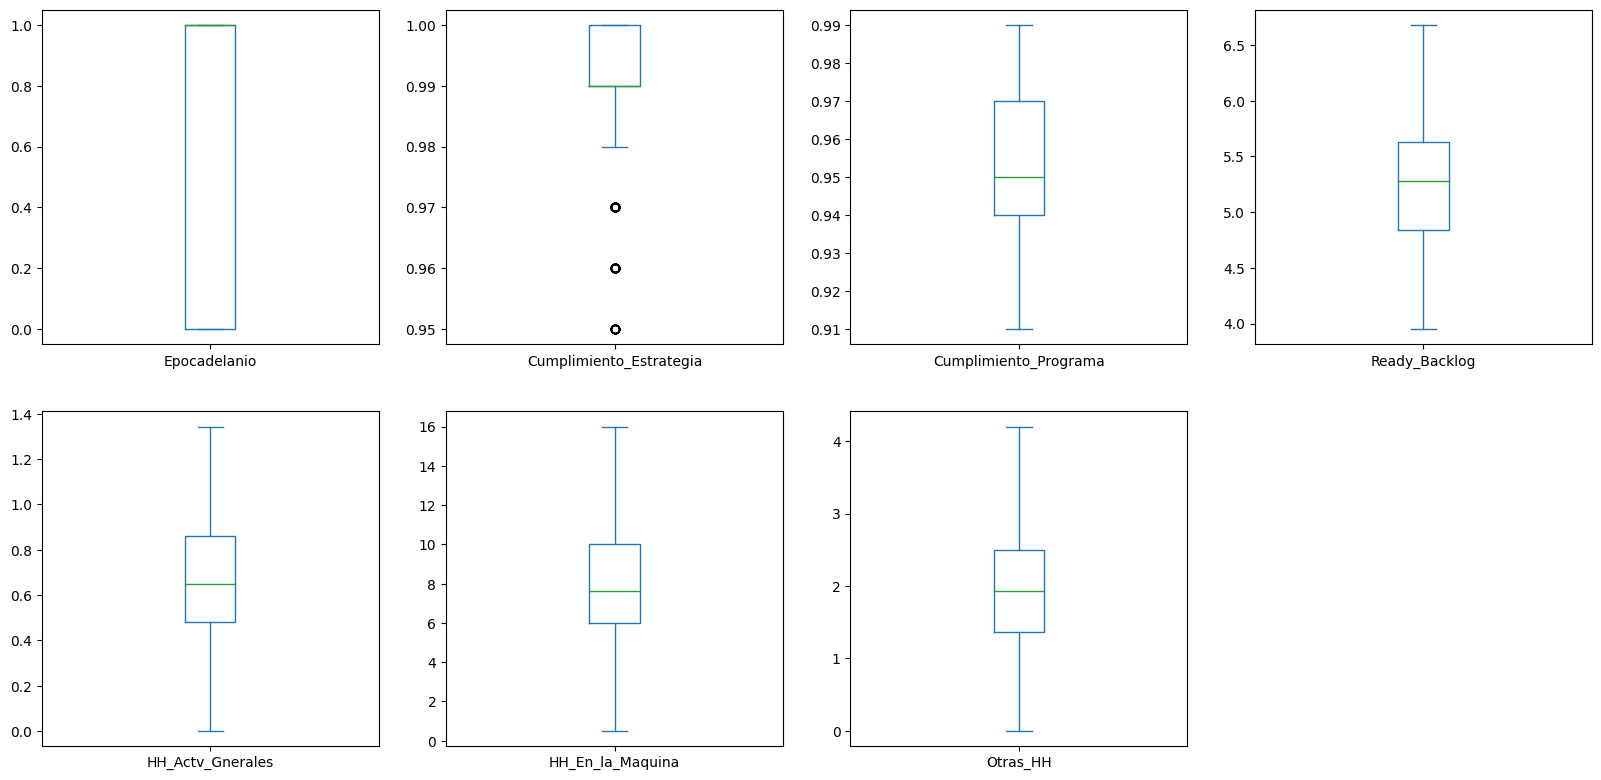

In [23]:
# box and whisker plots - Matplotlib
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.plot(ax=ax, kind= 'box', subplots=True, layout=(4,4))
plt.show()

Esto ayuda a señalar el sesgo en muchas distribuciones tanto que los datos se ven como valores atípicos (por ejemplo, más allá del bigote de los gráficos).

<a id="section311"></a>
### <font color="#004D7F"> Histograma</font>
También podemos crear un histograma de cada variable de entrada para tener una idea de la distribución.

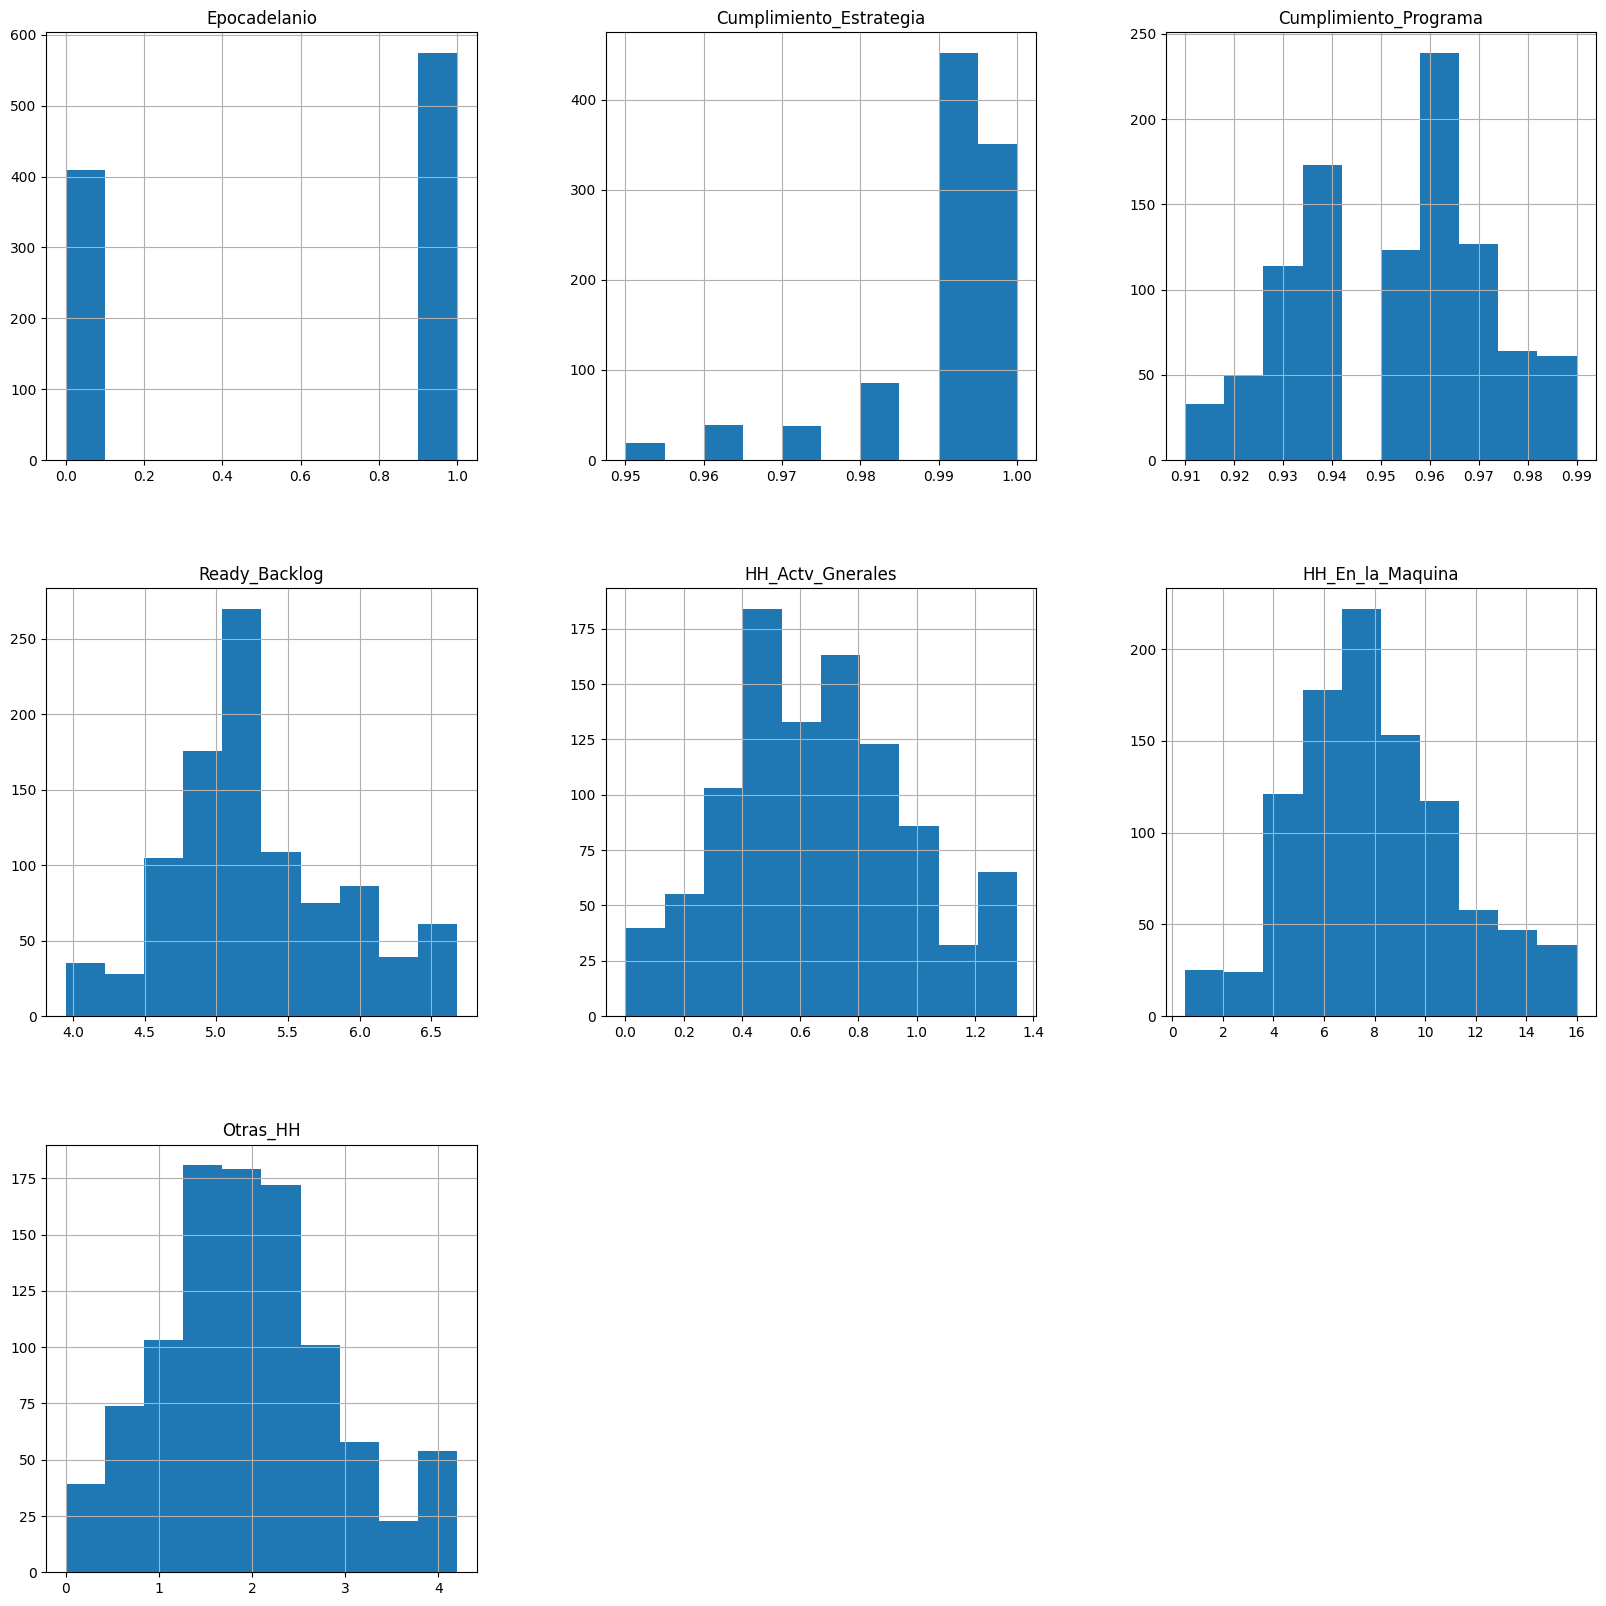

In [24]:
# histograms - Matplotlib
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dataset.hist(ax=ax)
plt.show()

Podemos ver que algunos atributos pueden tener una distribución exponencial, como `CRIM`, `ZN`, `AGE` y `B`. Podemos ver que otros pueden tener una distribución bimodal como `RAD` y `TAX`.

Esto quizás agrega más evidencia a nuestra sospecha sobre posibles distribuciones exponenciales y bimodales. También parece que `NOX`, `RM` y `LSTAT` pueden tener distribuciones gaussianas sesgadas, lo que podría ser útil más adelante con las transformaciones.

<a id="section32"></a>
## <font color="#004D7F"> 3.2. Gráficos multivariados</font>

Ahora podemos ver las interacciones entre las variables.

<a id="section321"></a>
### <font color="#004D7F"> Diagramas de dispersión</font>
Primero veamos los diagramas de dispersión de todos los pares de atributos y coloreamos los puntos por clase. Además, como los gráficos de dispersión muestran que los puntos para cada clase generalmente están separados, podemos dibujar puntos suspensivos alrededor de ellos.

Ahora podemos ver las interacciones entre las variables. Veamos gráficos de dispersión de todos los pares de atributos. Esto puede ser útil para detectar relaciones estructuradas entre variables de entrada. Tenga en cuenta la agrupación diagonal de algunos pares de atributos. Esto sugiere una alta correlación y una relación predecible.

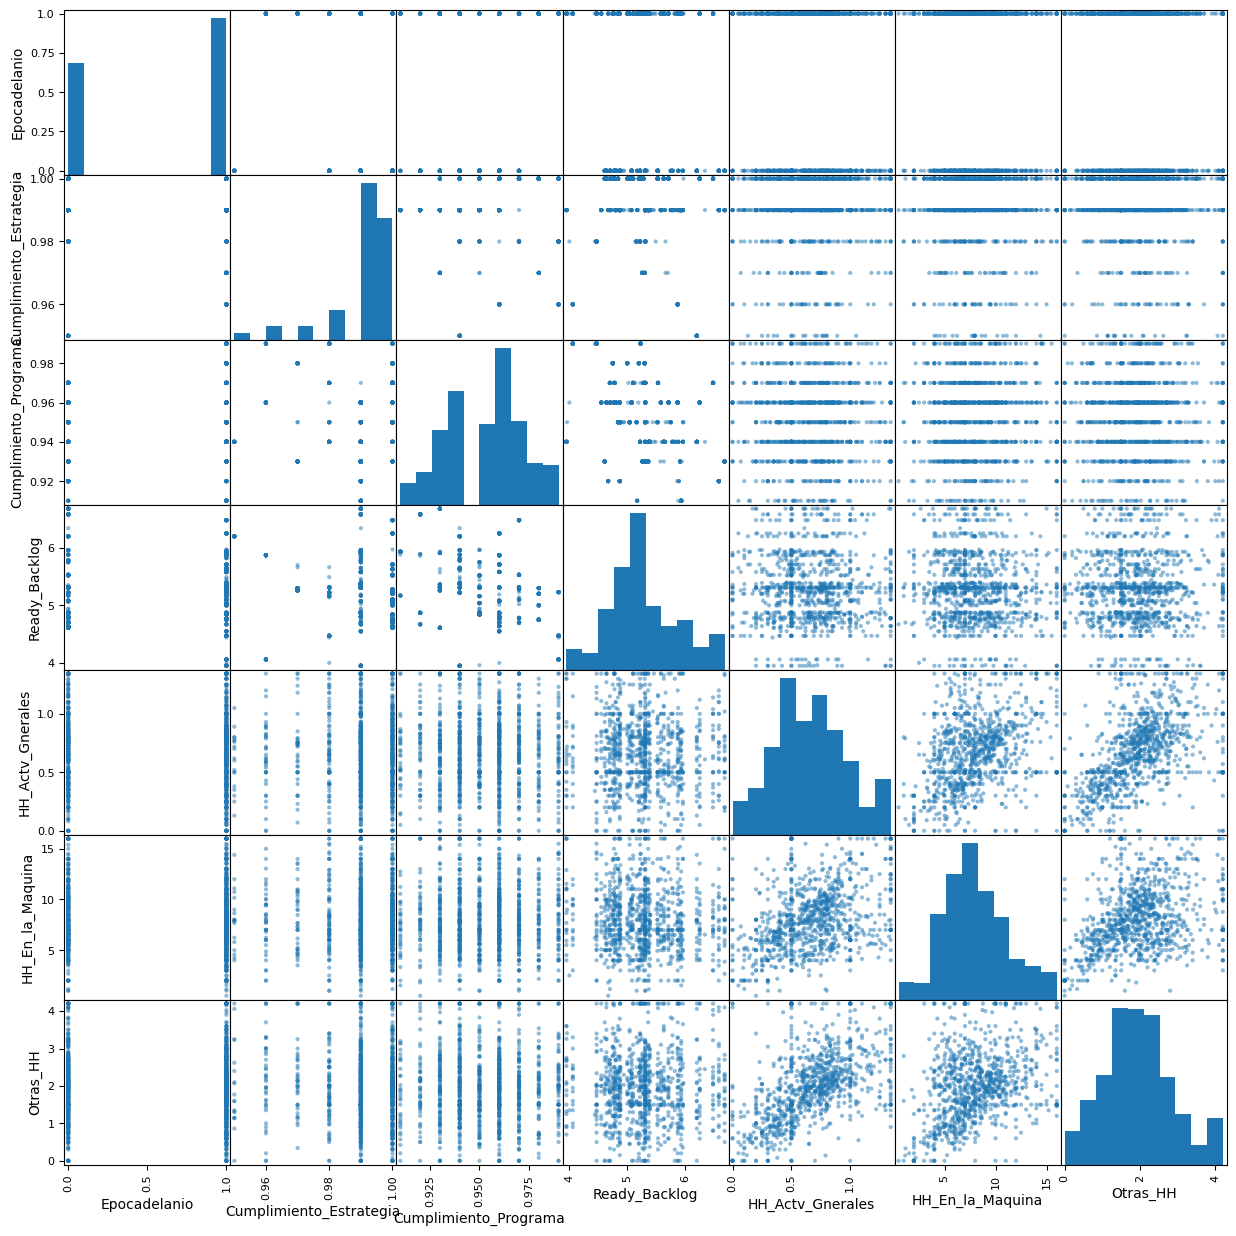

In [25]:
# scatter plot matrix - Matplotlib
plt.rcParams["figure.figsize"] = [15,15]
pd.plotting.scatter_matrix(dataset)
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F"> 4. Fase de modelado</font>

Ahora es el momento de crear algunos modelos de datos y estimar su Accruacy en datos no etiquetados. Esto es lo que vamos a cubrir en este paso:
* Crear conjunto de validación.
* Evaluación de línea base.
* Evaluar algoritmos: Estandarización.

<a id="section41"></a>
## <font color="#004D7F"> 4.1. Crear conjunto de validación</font>

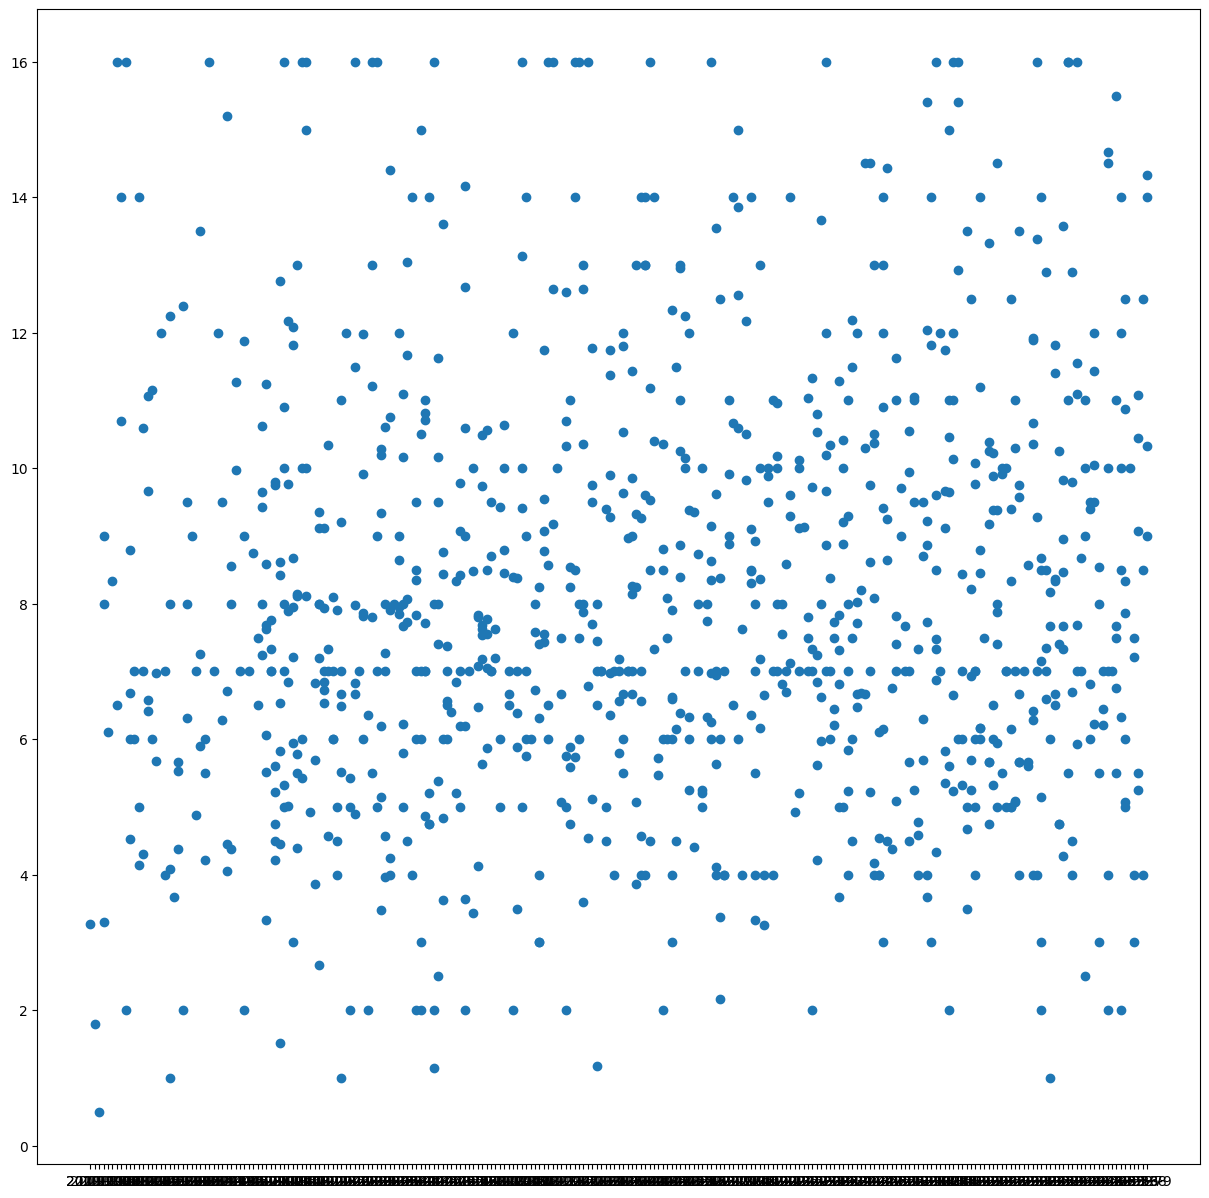

In [26]:
plt.scatter(dataset['semana'],dataset['HH_En_la_Maquina'])
plt.show()

Es una buena idea utilizar un conjunto de validación. Esta es una muestra de los datos que retenemos de nuestro análisis y modelado. Lo usamos justo al final de nuestro proyecto para confirmar el Accuracy de nuestro modelo final. Es una prueba que podemos usar para ver si nos equivocamos y para darnos confianza en nuestras estimaciones de Accuracy en datos no etiquetados. Dividiremos el conjunto de datos cargado en dos, el 80% de los cuales utilizaremos para entrenar nuestros modelos y el 20% como un conjunto de datos de validación

In [27]:
# Se crea este codigo para ver la posicion de l
posicion_variable = dataset.columns.get_loc('HH_En_la_Maquina')
posicion_variable

7

In [28]:
dataset=dataset.drop('semana', axis=1)


In [29]:
dataset=dataset.drop('Disciplina', axis=1)

In [30]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(
                                        dataset.drop('HH_En_la_Maquina', axis = 'columns'),
                                        dataset['HH_En_la_Maquina'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [31]:
# Se muestran los datos almacenados en la varaible  De entrenamiento.
X_train

,Epocadelanio,Cumplimiento_Estrategia,Cumplimiento_Programa,Ready_Backlog,HH_Actv_Gnerales,Otras_HH
330,1,1.0,1.0,6.5,1.0,1.8
500,1,1.0,1.0,5.3,0.5,0.0
352,1,1.0,1.0,5.6,0.5,1.5
736,1,1.0,0.9,5.3,0.5,1.0
918,1,1.0,0.9,4.0,0.6,2.8
...,...,...,...,...,...,...
204,0,1.0,0.9,6.6,0.3,0.9
53,0,1.0,0.9,5.9,0.5,1.2
294,1,1.0,1.0,5.7,0.5,1.3
723,1,1.0,1.0,5.3,1.3,1.5


In [32]:
# Se muestran los datos almacenados en la variable de validación.
X_test

,Epocadelanio,Cumplimiento_Estrategia,Cumplimiento_Programa,Ready_Backlog,HH_Actv_Gnerales,Otras_HH
166,0,1.0,0.9,5.3,2.0e-01,1.4
392,0,1.0,1.0,4.7,8.0e-02,0.0
40,1,1.0,0.9,5.2,4.0e-01,1.6
118,1,1.0,0.9,5.3,7.7e-01,2.5
953,1,1.0,1.0,4.5,2.5e-01,1.5
...,...,...,...,...,...,...
62,1,1.0,0.9,5.9,3.8e-01,1.1
937,1,1.0,1.0,4.1,4.0e-01,1.4
741,1,1.0,0.9,5.0,7.7e-01,2.4
262,1,1.0,1.0,5.9,8.3e-01,1.6


In [33]:
# Se muestran los datos de la variable Y_train.
y_train

330     9.5
500     3.0
352    16.0
736     4.8
918    11.6
       ... 
204     5.0
53      7.3
294     5.0
723     7.0
815     9.2
Name: HH_En_la_Maquina, Length: 787, dtype: float64

In [34]:
y_test

166     6.0
392     2.0
40      1.0
118     9.8
953     6.8
       ... 
62      6.3
937     8.0
741     5.7
262     4.9
61     12.0
Name: HH_En_la_Maquina, Length: 197, dtype: float64

**Información de las variables:** con las siguientes lineas de código se muestra la información almacenada en cada una de las variables.

In [35]:
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (787, 6)
La forma de y_train es:  (787,)
La forma de X_test es:  (197, 6)
La forma de y_test es:  (197,)


<a id="section43"></a>
## <font color="#004D7F"> 4.3. Evaluar modelos: estandarización</font>

Sospechamos que las diferentes distribuciones de los datos en bruto pueden estar afectando negativamente a la habilidad de algunos de los algoritmos. Vamos a evaluar los mismos algoritmos con una copia estandarizada del conjunto de datos. Aquí es donde los datos se transforman de manera que cada atributo tenga un valor medio de cero y una desviación estándar de uno.

También debemos evitar la fuga de datos cuando transformamos los datos. Una buena manera de evitar fugas es usar Pipelines que estandaricen los datos y construyan el modelo para cada _fold_ de la validación cruzada. De esa forma podemos obtener una estimación justa de cómo cada modelo con datos estandarizados podría funcionar en datos no vistos.

In [36]:
# Normalización con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train
X_test

array([[0.        , 0.8       , 0.5       , 0.4981685 , 0.14885383,
        0.33333333],
       [0.        , 0.8       , 0.625     , 0.27472527, 0.05954153,
        0.        ],
       [1.        , 0.6       , 0.5       , 0.44322344, 0.29770765,
        0.38095238],
       ...,
       [1.        , 1.        , 0.5       , 0.3992674 , 0.57308723,
        0.57142857],
       [1.        , 0.2       , 0.625     , 0.7032967 , 0.61774338,
        0.38809524],
       [1.        , 0.8       , 0.25      , 0.71794872, 0.        ,
        0.        ]])

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>

In [118]:
# Codigo para crea un conjunto de datos y usarlos en la validación del modelo  en pasos adelante.
datos = dataset.drop(dataset.columns[:3], axis=1)

**Primer Modelo**: Se crea el primer modelo  "model_1a", sin usar hiperparametros y se ajusta con los datos de entrenamiento

In [38]:
# Se crea el modelo 1 sin usar Hiperparamtros
from sklearn.tree import DecisionTreeRegressor

# Crear un árbol de decisión y ajustarlo a los datos de entrenamiento
model_1a = DecisionTreeRegressor(criterion='absolute_error', max_depth=7)
model_1a.fit(X_train, y_train)

# hacer predicciones con los datos de entrenamiento
y_pred_train = model_1a.predict(X_train)



In [39]:
# Hacer predicciones en los datos de prueba o Validación.
y_predM1 = model_1a.predict(X_test)
y_predM1

array([ 6.9  ,  4.   ,  7.   ,  8.555,  5.67 ,  6.76 ,  8.165,  7.5  ,
        7.56 ,  7.   ,  9.355,  9.57 ,  4.85 ,  9.57 ,  9.57 , 12.   ,
        8.375,  6.7  ,  6.   ,  7.   , 11.125, 15.2  ,  8.555,  8.555,
        6.76 ,  9.   ,  8.555,  9.   ,  4.   ,  8.165, 15.2  ,  6.67 ,
        6.75 ,  9.57 ,  8.375,  9.   ,  8.375, 11.   ,  6.   ,  8.165,
        8.375, 10.6  ,  6.67 ,  4.5  ,  8.555,  9.355,  3.405,  4.85 ,
        8.555,  9.   ,  8.555,  4.   ,  7.   ,  8.375,  6.76 ,  0.5  ,
        4.   ,  8.555,  6.67 ,  9.57 ,  8.555,  8.165, 11.75 ,  7.   ,
        5.   ,  6.76 , 11.125,  7.   ,  7.   ,  4.28 ,  6.67 ,  9.355,
        9.   ,  6.   ,  6.   ,  6.76 ,  8.555,  9.57 ,  7.   ,  8.165,
       11.125,  7.   ,  7.705,  5.67 ,  9.   ,  6.67 , 11.75 ,  8.375,
        8.165,  6.76 , 11.   ,  7.2  ,  9.57 ,  9.57 ,  6.7  ,  7.855,
        7.   ,  9.57 ,  7.   , 11.   ,  8.375,  7.   ,  9.355,  9.57 ,
       11.   ,  8.555,  5.78 ,  5.   ,  6.76 ,  9.   ,  8.165,  6.67 ,
      

**MAE - Error Absoluto Medio:** s una métrica comúnmente utilizada para evaluar la precisión de modelos de regresión, incluidos los modelos de árboles de decisión.

El MAE se calcula como el promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales. En términos simples, el MAE mide la magnitud promedio de los errores en las predicciones del modelo, sin considerar la dirección de los errores.

Para un modelo de árbol de decisión, el MAE se calcula de la siguiente manera:

a: Se hace una predicción para cada ejemplo en el conjunto de datos de prueba usando el modelo de árbol de decisión.

b: Se calcula la diferencia absoluta entre la predicción y el valor real para cada ejemplo.

c: Se toma el promedio de todas estas diferencias absolutas.

Para mayor información:
https://statologos.com/calculadora-del-error-medio-absoluto/






In [41]:
# calcular el MAE de entrenamiento con cros Validation
from sklearn.model_selection import cross_val_score
mae_train = -1 * cross_val_score(model_1a, X_train,y_train, cv=5, scoring='neg_mean_absolute_error').mean()
print("MAE de entrenamiento Cros Validation:", mae_train)

MAE de entrenamiento Cros Validation: 2.5147929130049183


**Predicciones**: Se hacen las respectivas predicciones, donde se cita la variables y_predM1 -  y se compara con los valores reales de validación.

In [42]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones3 = pd.DataFrame({'TotalHotasReales' : y_test, 'TotalPrediccion' : y_predM1})
df_predicciones3.head(122)

,TotalHotasReales,TotalPrediccion
166,6.0,6.9
392,2.0,4.0
40,1.0,7.0
118,9.8,8.6
953,6.8,5.7
...,...,...
951,7.7,9.4
539,16.0,8.2
112,7.0,6.8
668,7.0,7.0


In [44]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones4 = pd.DataFrame({'TotalHotasReales' : y_train, 'TotalPrediccion' : y_pred_train})
df_predicciones4.head(111)

,TotalHotasReales,TotalPrediccion
330,9.5,10.1
500,3.0,2.0
352,16.0,7.0
736,4.8,6.8
918,11.6,9.4
...,...,...
121,7.9,9.0
369,8.2,5.7
900,9.0,9.7
36,4.0,4.6


**Se crea un gráfico del arbol que se genera para este caso**: Se observa que la profundidad es de 7 y tiene un total de 118 Nodos.

Profundidad del árbol: 7
Número de nodos terminales: 89


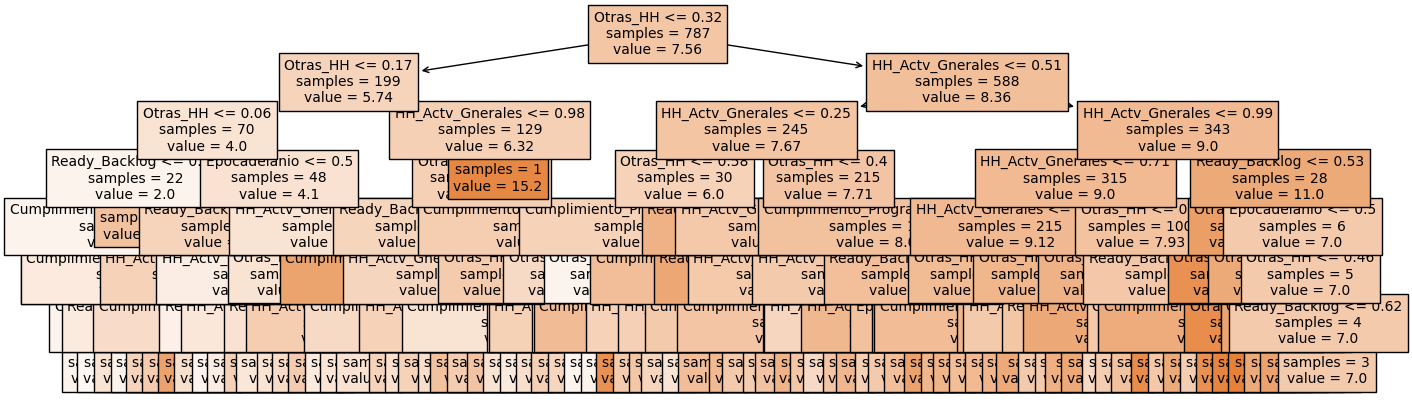

In [45]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(16, 5))

print(f"Profundidad del árbol: {model_1a.get_depth()}")
print(f"Número de nodos terminales: {model_1a.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model_1a,
            feature_names = dataset.drop(columns = "HH_En_la_Maquina").columns,
            class_names   = 'HH_En_la_Maquina',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [46]:
from sklearn.tree import export_text
texto_modelo = export_text(
                    decision_tree = model_1a,
                    feature_names = list(dataset.drop(columns = "HH_En_la_Maquina").columns)
               )
print(texto_modelo)

|--- Otras_HH <= 0.32
|   |--- Otras_HH <= 0.17
|   |   |--- Otras_HH <= 0.06
|   |   |   |--- Ready_Backlog <= 0.77
|   |   |   |   |--- Cumplimiento_Programa <= 0.44
|   |   |   |   |   |--- Ready_Backlog <= 0.36
|   |   |   |   |   |   |--- value: [0.50]
|   |   |   |   |   |--- Ready_Backlog >  0.36
|   |   |   |   |   |   |--- Otras_HH <= 0.02
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |--- Otras_HH >  0.02
|   |   |   |   |   |   |   |--- value: [1.33]
|   |   |   |   |--- Cumplimiento_Programa >  0.44
|   |   |   |   |   |--- Cumplimiento_Programa <= 0.56
|   |   |   |   |   |   |--- value: [11.00]
|   |   |   |   |   |--- Cumplimiento_Programa >  0.56
|   |   |   |   |   |   |--- Ready_Backlog <= 0.48
|   |   |   |   |   |   |   |--- value: [4.00]
|   |   |   |   |   |   |--- Ready_Backlog >  0.48
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |--- Ready_Backlog >  0.77
|   |   |   |   |--- value: [8.00]
|   |   |--- Otras_HH >  0.06
|   

**Importancia de las Variables predictoras:**

In [47]:
importancia_predictores = pd.DataFrame(
                            {'predictor': dataset.drop(columns = "HH_En_la_Maquina").columns,
                             'importancia': model_1a.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,Otras_HH,5.2e-01
4,HH_Actv_Gnerales,2.3e-01
3,Ready_Backlog,1.3e-01
2,Cumplimiento_Programa,8.6e-02
0,Epocadelanio,2.0e-02
1,Cumplimiento_Estrategia,1.7e-02


**Se crea un nuevo modelo usando hiperparametros**

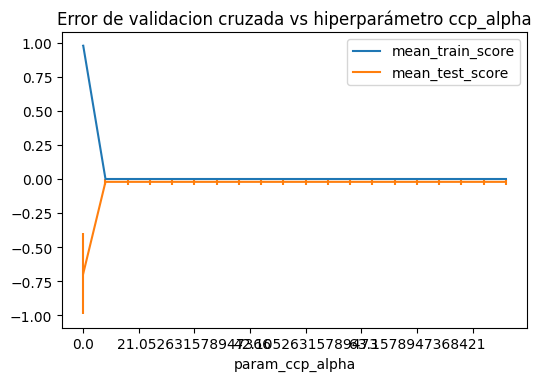

In [48]:
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [54]:
grid.best_params_

{'ccp_alpha': 4.2105263157894735}

**Se crea el modelo** Y se crea la imagen del arbol final.

In [56]:
# Estructura del árbol final - "Modelofinal"
# ------------------------------------------------------------------------------

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Creamos un modelo de árbol de decisión
tree = model_1a = DecisionTreeRegressor()

# Usamos GridSearchCV para encontrar la mejor combinación de hiperparámetros
modelo_final = GridSearchCV(tree, param_grid, cv=5)
modelo_final.fit(X_train, y_train)

# Mostramos los mejores hiperparámetros encontrados



# hacer predicciones con los datos de entrenamiento
Predicion_MF_entrenamiento = modelo_final.predict(X_train)
Predicion_MF_test = modelo_final.predict(X_test)

In [61]:
# Los mejores hiperparametros.
param_grid


{'max_depth': [3, 5, 7],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['sqrt', 'log2']}

**Comparacion del MAE para los dos modelos creados.**

1: MAE para modelo sin hiperparametros: 3.12

2: MAE: para el modelo con ajuste de hiperparametros: 3.12.

Nota: El MAE mide la magnitud promedio de los errores en las predicciones de un modelo de regresión, sin tener en cuenta su dirección (es decir, si son sobreestimaciones o subestimaciones).

Por lo tanto, un MAE más bajo indica que las predicciones del modelo están más cerca de los valores reales en el conjunto de datos de prueba. En otras palabras, cuanto más bajo sea el MAE, mejor será el ajuste del modelo a los datos observados y, por lo tanto, se considera un mejor rendimiento del modelo.

fuente: ChatGPT

In [57]:
# calcular el MAE de entrenamiento con cros Validation  - COn Hiperparametros
from sklearn.model_selection import cross_val_score
mae_train = -1 * cross_val_score(modelo_final, X_train,y_train, cv=5, scoring='neg_mean_absolute_error').mean()
print("MAE de entrenamiento Cros Validation:", mae_train)

MAE de entrenamiento Cros Validation: 2.2767010433115455


In [58]:
# calcular el MAE de entrenamiento con cros Validation
from sklearn.model_selection import cross_val_score
mae_train = -1 * cross_val_score(model_1a, X_train,y_train, cv=5, scoring='neg_mean_absolute_error').mean()
print("MAE de entrenamiento Cros Validation:", mae_train)

MAE de entrenamiento Cros Validation: 3.1248856459458736


**Conclusión**

El modelo con ajuste de hiperparametros es mas eficiente para predecir las HH necesarias para trabajos correctivos en una empresa industrial.

In [59]:
# Se crea un dataframe con las predicciones y el valor real
df_predicciones5 = pd.DataFrame({'TotalHotasReales' : y_test, 'TotalPrediccion' : Predicion_MF_test
})
df_predicciones5.head(5)

,TotalHotasReales,TotalPrediccion
166,6.0,8.6
392,2.0,2.2
40,1.0,8.6
118,9.8,8.6
953,6.8,9.4
